# Abbas Khanzada
**Final Project**


## Research Question and design:
**How does age, education, and work status influence income levels among individuals?**

The dataset used for this analysis is the General Social Survey (GSS) 2012.  
The variables included in the analysis are:
- `income06`: Income level (numerical)
- `age`: Age of the respondent (numerical)
- `educ`: Years of education (numerical)
- `sex`: Respondent's gender (categorical)
- `wrkstat`: Work status of the respondent (categorical)

This project explores the relationship between income, age, education, work status, and gender through univariate, bivariate, and multivariate analyses.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load the dataset
data_url = "https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/exploratory-data-analysis/data/gss2012.csv"
data = pd.read_csv(data_url)


In [35]:
url = "https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/exploratory-data-analysis/data/gss2012.csv"
data = pd.read_csv(url)

print("Columns in the dataset:\n", data.columns)
print("First few rows of the dataset:\n", data.head())


Columns in the dataset:
 Index(['year', 'id', 'wrkstat', 'wrkslf', 'wrkgvt', 'marital', 'sibs',
       'childs', 'age', 'educ',
       ...
       'south', 'divlaw2', 'age.f', 'mslm_spk.high', 'mslm_spk.yes',
       'grass.legal', 'age2', 'relig2', 'dem', 'science_quiz.f'],
      dtype='object', length=221)
First few rows of the dataset:
    year   id            wrkstat        wrkslf      wrkgvt        marital  \
0  2012  1.0  WORKING PART TIME  SOMEONE ELSE     PRIVATE  Never married   
1  2012  2.0  WORKING PART TIME  SOMEONE ELSE     PRIVATE  Never married   
2  2012  3.0  WORKING FULL TIME  SOMEONE ELSE     PRIVATE        Married   
3  2012  4.0                NaN  SOMEONE ELSE     PRIVATE        Married   
4  2012  5.0            RETIRED  SOMEONE ELSE  GOVERNMENT      Separated   

   sibs  childs   age        educ  ...     south         divlaw2 age.f  \
0   1.0     0.0  22.0     4 years  ...  Nonsouth  More difficult  22.0   
1   2.0     0.0  21.0  12th grade  ...  Nonsouth       

In [37]:
# Select relevant variables
main_vars = ['income06', 'age', 'educ', 'sex', 'wrkstat']
data = data[main_vars]


## Data Preprocessing
Data preprocessing ensures that the dataset is clean and ready for analysis. The following steps were performed:

### a. Data Transformation and Cleaning Process:


1. **Income Transformation**:
   - The raw income data in `income06` was stored as strings with inconsistent formats (e.g., ranges like "50,000 TO 59,999", upper limits like "150,000 OR OVER", and phrases like "UNDER 1,000").
   - Transformation was necessary to convert these strings into numeric values for meaningful analysis and categorization.
   - Recoding income into categories (e.g., Low, Lower-Middle, Upper-Middle, High) enabled easier interpretation and comparison across income levels.

2. **Education Transformation**:
   - The `educ` variable was recorded as strings (e.g., "4 years", "12th grade"), which needed standardization and conversion to numeric values (years of education).
   - Specifying the correct ordering of education levels was critical since this is an ordinal variable.

3. **Missing Values**:
   - Missing values in key variables (`income06`, `educ`, `age`, `sex`, `wrkstat`) were handled by dropping rows where critical information was absent.
   - This ensured a clean dataset while retaining valid observations.

4. **Categorical Variables**:
   - Variables like `sex` and `wrkstat` contained categorical information and required cleaning to ensure consistency (e.g., removing trailing spaces, standardizing capitalization).

5. **Verification**:
   - After transformations, descriptive statistics and visualizations were used to verify the correctness of the transformations and to ensure the data was ready for analysis.

### b. Addressing the Issues:

1. **Income Transformation**:
   - Cleaned the `income06` variable by:
     - Removing special characters (e.g., `$`, `,`).
     - Parsing ranges (e.g., "50,000 TO 59,999") by averaging the low and high values.
     - Recoding phrases like "UNDER 1,000" as `0` and "150,000 OR OVER" as `150,000`.
   - Verified the transformation with descriptive statistics and checked the distribution using a bar chart.

2. **Education Transformation**:
   - Recoded `educ` into numeric years of education:
     - Mapped phrases like "4 years" to `4` and "12th grade" to `12`.
     - Handled edge cases like "1st grade" (mapped to `1`) and missing values (`NaN`).
   - Created a histogram to visualize the distribution of education levels.

3. **Missing Values**:
   - Checked for missing values in all variables and removed rows with `NaN` in critical columns (`income06`, `educ`, `age`, `sex`, `wrkstat`).

4. **Verification and Visualization**:
   - Verified the transformations with descriptive statistics (e.g., mean, median) and visualizations (e.g., histograms, bar charts).
   - Plotted the distribution of income categories, years of education, and age.


In [39]:
# Transform income06
# Clean income06 variable
# Function to clean and parse income values
# Define a function to clean and parse income values
def parse_income(value):
    if isinstance(value, str):
        # Remove dollar signs, commas, and spaces
        value = value.replace('$', '').replace(',', '').replace(' TO ', '-').replace(' ', '').strip()
        if '-' in value:  # Handle ranges (e.g., 110000-129999)
            try:
                low, high = map(int, value.split('-'))
                return (low + high) / 2  # Average of the range
            except ValueError:
                return None  # Invalid range
        elif value.isnumeric():  # Handle single values (e.g., 50000)
            return int(value)
        elif "OVER" in value:  # Handle "OVER" cases (e.g., $150000 OR OVER)
            try:
                return int(value.replace("OVER", "").strip())
            except ValueError:
                return None
        elif "UNDER" in value:  # Handle "UNDER" cases (e.g., UNDER $1 000)
            return 0
    return None  # Return None for invalid or missing values

# Apply the function to the income06 column
data['income06'] = data['income06'].apply(parse_income)

# Convert the cleaned column to numeric
data['income06'] = pd.to_numeric(data['income06'], errors='coerce')

# Verify the transformation
print("Income Transformation Summary:")
print(data['income06'].describe())



Income Transformation Summary:
count      1614.000000
mean      47977.822181
std       35243.041458
min           0.000000
25%       18749.500000
50%       37499.500000
75%       67499.500000
max      139999.500000
Name: income06, dtype: float64


In [41]:
# Recode income06 into categories
# Define bins and labels for income categories
income_bins = [0, 20000, 50000, 100000, float('inf')]
income_labels = ['Low', 'Lower-Middle', 'Upper-Middle', 'High']

# Create a categorical variable for income
data['income_category'] = pd.cut(data['income06'], bins=income_bins, labels=income_labels)

# Check the distribution of income categories
print("Income Category Distribution:")
print(data['income_category'].value_counts())


Income Category Distribution:
income_category
Lower-Middle    560
Upper-Middle    526
Low             391
High            113
Name: count, dtype: int64


In [225]:
# Clean age variable
data['age'] = pd.to_numeric(data['age'], errors='coerce')


In [227]:
# Clean educ variable
data['educ'] = pd.to_numeric(data['educ'], errors='coerce')

In [229]:
# Clean sex variable
data['sex'] = data['sex'].str.strip().str.lower()

In [231]:
# Clean work status variable
data['wrkstat'] = data['wrkstat'].str.strip().str.lower()

In [233]:
# Handle missing values
data = data.dropna(subset=['income06', 'age', 'educ', 'sex', 'wrkstat'])

## Univariate Analysis
We explore the distribution of each variable: income, age, education, gender, and work status.

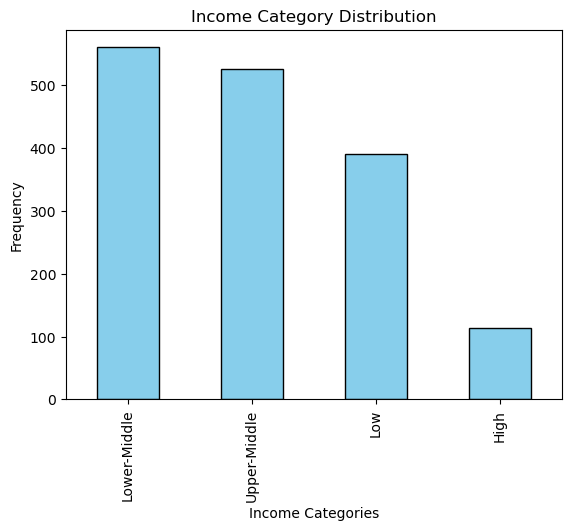

In [43]:
# Visualize income category distribution
income_dist = data['income_category'].value_counts()

if not income_dist.empty:
    income_dist.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Income Category Distribution')
    plt.xlabel('Income Categories')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No data available for income categories.")


In [45]:
# Descriptive statistics for 'age'
print("Age Summary:")
print(data['age'].describe())

Age Summary:
count    1969.000000
mean       48.193499
std        17.687113
min        18.000000
25%        33.000000
50%        47.000000
75%        61.000000
max        89.000000
Name: age, dtype: float64


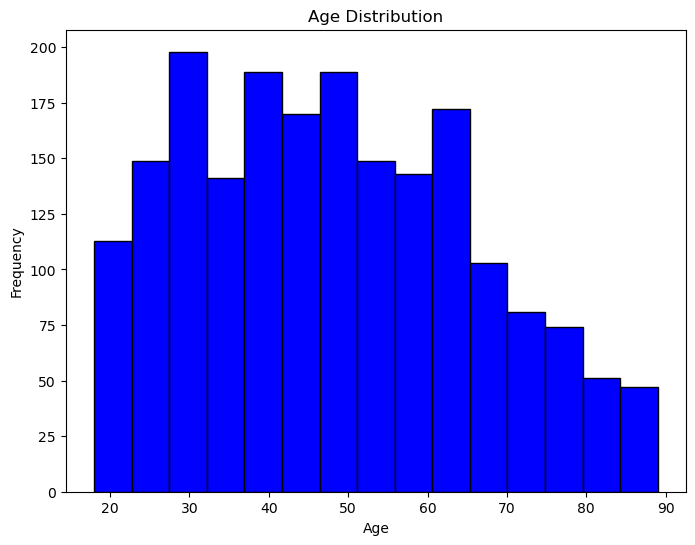

In [49]:
# Histogram for 'age'
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=15, edgecolor='black', color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [51]:
# Descriptive statistics for 'educ'
print("Education Summary:")
print(data['educ'].describe())

Education Summary:
count           1969
unique            20
top       12th grade
freq             540
Name: educ, dtype: object


In [53]:
# Inspect unique values in the 'educ' column
print("Unique values in 'educ':")
print(data['educ'].unique())

# Check for null values in 'educ'
print("Number of NaN values in 'educ':", data['educ'].isna().sum())


Unique values in 'educ':
['4 years' '12th grade' '1 yr coll' '7 years' '3 years' '11th grade'
 '9th grade' '5 years' '10th grade' '4th grade' nan '2 years' '6 years'
 '8 years' '8th grade' '6th grade' '5th grade' '7th grade' '3rd grade'
 '1st grade' '2nd grade']
Number of NaN values in 'educ': 5


In [55]:
# Define a mapping for education levels
education_mapping = {
    '1st grade': 1, '2nd grade': 2, '3rd grade': 3, '4th grade': 4,
    '5th grade': 5, '6th grade': 6, '7th grade': 7, '8th grade': 8,
    '9th grade': 9, '10th grade': 10, '11th grade': 11, '12th grade': 12,
    '1 yr coll': 13, '2 years': 14, '3 years': 15, '4 years': 16,
    '5 years': 17, '6 years': 18, '7 years': 19, '8 years': 20
}

# Map the 'educ' column using the dictionary
data['educ'] = data['educ'].map(education_mapping)

# Handle missing values (if necessary)
data = data.dropna(subset=['educ'])

# Verify the transformation
print("Education Summary after transformation:")
print(data['educ'].describe())


Education Summary after transformation:
count    1969.000000
mean       13.548502
std         3.083988
min         1.000000
25%        12.000000
50%        13.000000
75%        16.000000
max        20.000000
Name: educ, dtype: float64


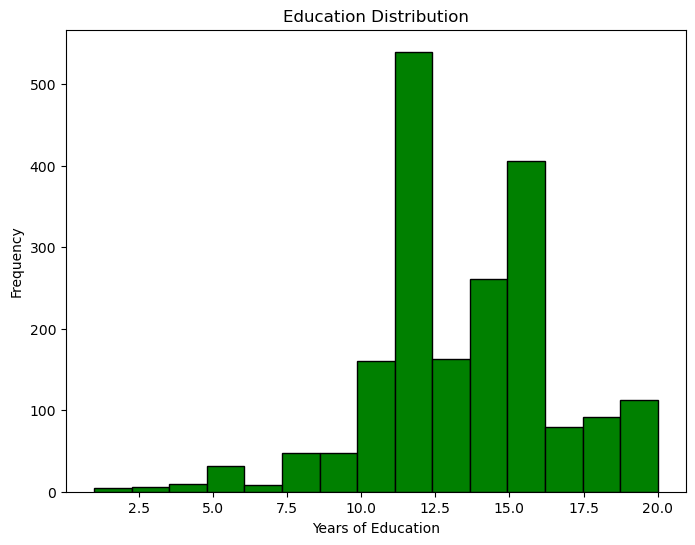

In [57]:
# Histogram for 'educ'
plt.figure(figsize=(8, 6))
plt.hist(data['educ'], bins=15, edgecolor='black', color='green')
plt.title('Education Distribution')
plt.xlabel('Years of Education')
plt.ylabel('Frequency')
plt.show()


In [59]:
# Frequency counts for 'sex'
print("Gender Distribution:")
print(data['sex'].value_counts())


Gender Distribution:
sex
Female    1086
Male       883
Name: count, dtype: int64


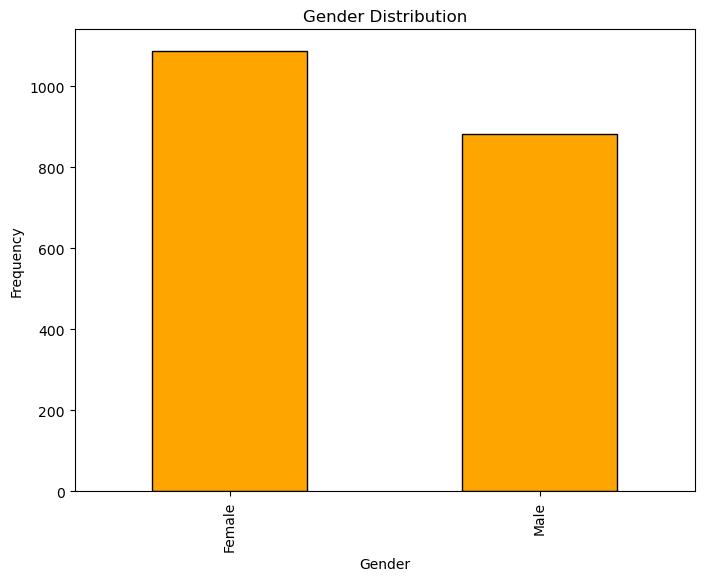

In [61]:
# Bar plot for 'sex'
plt.figure(figsize=(8, 6))
data['sex'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [63]:
# Frequency counts for 'wrkstat'
print("Work Status Distribution:")
print(data['wrkstat'].value_counts())


Work Status Distribution:
wrkstat
WORKING FULL TIME       910
RETIRED                 355
WORKING PART TIME       226
KEEPING HOUSE           210
UNEMPLOYED, LAID OFF    103
SCHOOL                   70
TEMP NOT WORKING         40
Name: count, dtype: int64


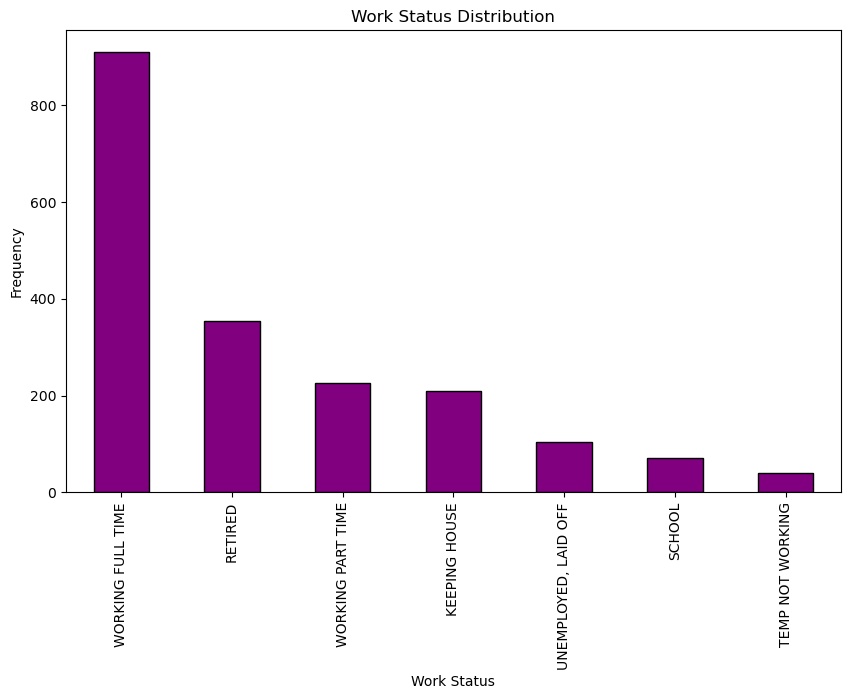

In [65]:
# Bar plot for 'wrkstat'
plt.figure(figsize=(10, 6))
data['wrkstat'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Work Status Distribution')
plt.xlabel('Work Status')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

In [67]:
# Groupby and agg: Relationship between income and education
income_educ_grouped = data.groupby('income_category', observed=False)['educ'].agg(['mean', 'median', 'std'])
print("Income and Education Relationship:\n", income_educ_grouped)


Income and Education Relationship:
                       mean  median       std
income_category                             
Low              11.976982    12.0  2.776639
Lower-Middle     13.094643    13.0  2.770269
Upper-Middle     14.317490    14.0  2.737388
High             15.849558    16.0  2.387547


**The analysis shows a clear trend: higher income categories correspond to higher average and median years of education. Specifically:**

Low income: Average 11.98 years of education (median 12).  
Lower-Middle income: Average 13.09 years (median 13).  
Upper-Middle income: Average 14.32 years (median 14).  
High income: Average 15.85 years (median 16).  

In [69]:
# Pivot Table: Relationship between income and work status
income_work_pivot = pd.pivot_table(data, index='income_category', columns='wrkstat', values='income06', aggfunc='mean', observed=False)
print("Income and Work Status Relationship:\n", income_work_pivot)

Income and Work Status Relationship:
 wrkstat          KEEPING HOUSE        RETIRED    SCHOOL  TEMP NOT WORKING  \
income_category                                                             
Low               10728.071429   11428.847826   10424.5      11999.500000   
Lower-Middle      32831.132653   31613.136364   34999.5      33076.423077   
Upper-Middle      78905.750000   70713.785714   77187.0      68999.500000   
High             127499.500000  125713.785714  139999.5     119999.500000   

wrkstat          UNEMPLOYED, LAID OFF  WORKING FULL TIME  WORKING PART TIME  
income_category                                                              
Low                       9723.858974       12950.049451       10851.351852  
Lower-Middle             31209.177419       35680.890977       32228.666667  
Upper-Middle             71590.409091       76425.880368       75528.346154  
High                    131428.071429      128528.911765      127499.500000  


**Income and Work Status Relationship: The pivot table reveals variations in income levels across work status categories:**

Working full-time consistently shows the highest average income within each income category.  
Unemployed/laid off and temporary not working have the lowest average incomes, regardless of income category.  
Retired and keeping house display moderately low average incomes, reflecting limited income-generating capacity.     

The relationship between work status and income confirms that employment type plays a significant role in determining income levels. This finding aligns with assumptions that full-time employment yields higher earnings compared to other work statuses.

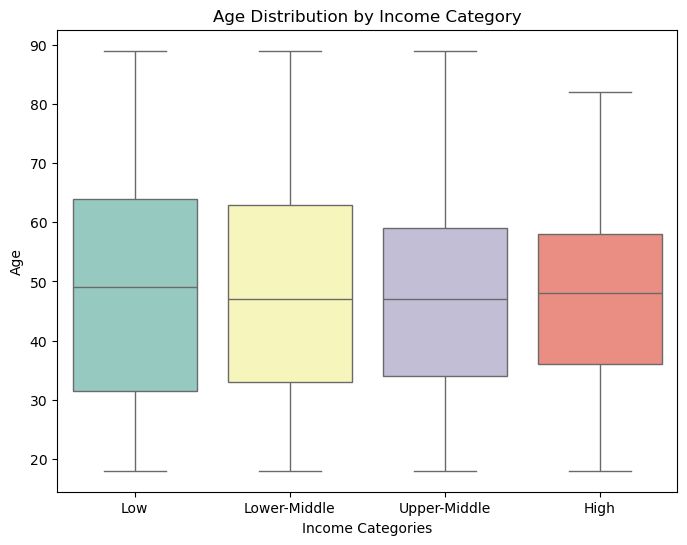

In [71]:
# Visualization: Age distribution by income category
if not data['income_category'].isnull().all() and not data['age'].isnull().all():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='income_category', y='age', data=data, hue='income_category', palette='Set3', dodge=False)
    plt.legend([],[], frameon=False)  
    plt.title('Age Distribution by Income Category')
    plt.xlabel('Income Categories')
    plt.ylabel('Age')
    plt.show()
else:
    print("No valid data for age or income categories.")

**The boxplot shows how age is distributed within each income category:**

Median Age: Median age increases slightly from Low to High income categories, suggesting older individuals may earn more.  

Age Range: All categories have a broad age range, but the High-income group has a slightly narrower range.  

Spread of Ages: The middle 50% of ages (IQR) is similar across all categories, indicating income is not strongly clustered by age.  

Outliers: No extreme outliers are visible, showing stable age groupings.  

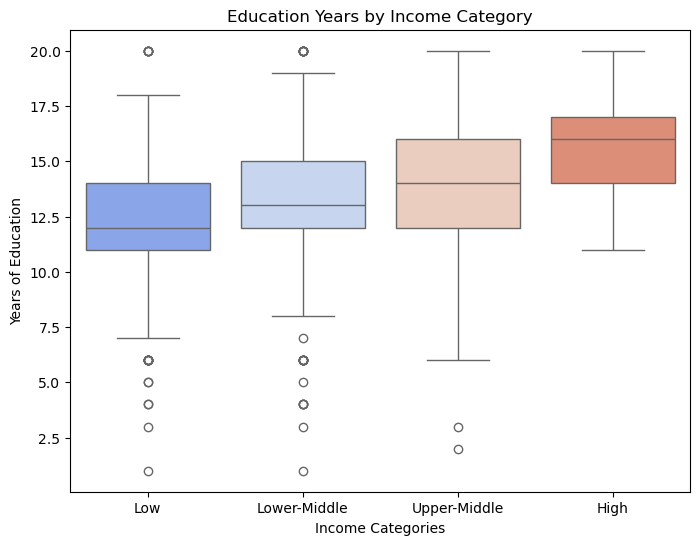

In [73]:
# Visualization: Education by income category
if not data['income_category'].isnull().all() and not data['educ'].isnull().all():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='income_category', y='educ', data=data, hue='income_category', palette='coolwarm', dodge=False)
    plt.legend([],[], frameon=False)  # Remove redundant legend
    plt.title('Education Years by Income Category')
    plt.xlabel('Income Categories')
    plt.ylabel('Years of Education')
    plt.show()

else:
    print("No valid data for education years or income categories.")


**Education and Income Category Relationship:**   
The boxplot indicates that individuals in the "High" income category generally have more years of education, with a median close to 16 years. The "Upper-Middle" income group shows a slightly lower median at approximately 14 years, followed by "Lower-Middle" and "Low" income groups, which have medians around 13 and 12 years, respectively. The range of education years also narrows as income levels increase, reflecting a closer correlation between higher income and advanced education levels.

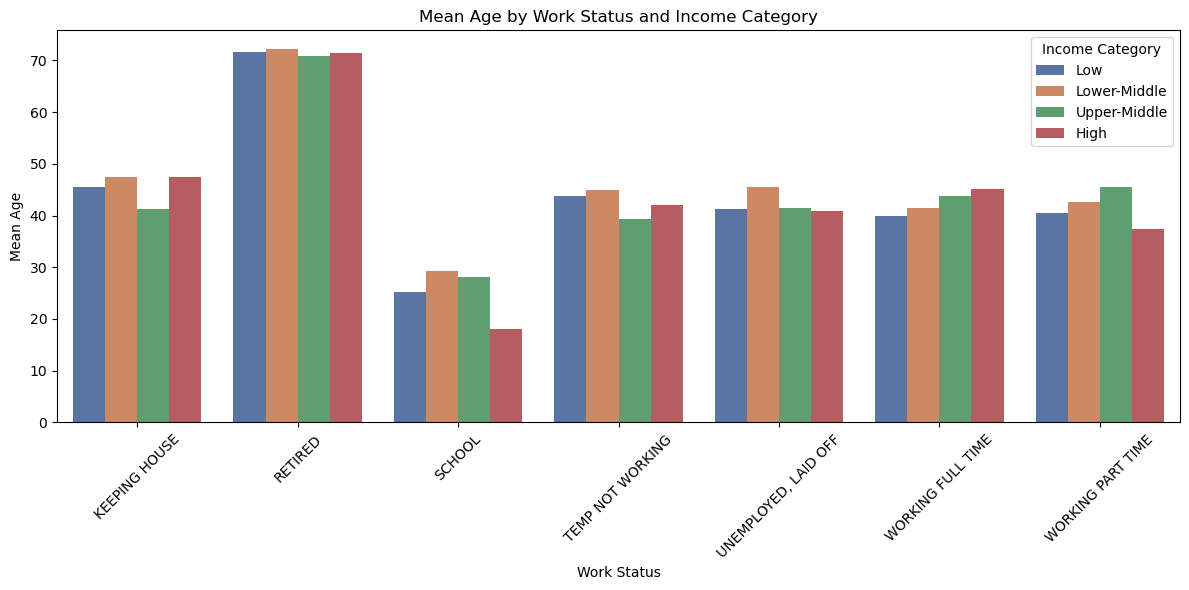

In [94]:
# Multivariate visualization: Work Status, Income Category, and Mean Age
income_work_age = data.groupby(['wrkstat', 'income_category'], observed=False)['age'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=income_work_age,
    x='wrkstat',
    y='age',
    hue='income_category',
    palette='deep'
)
plt.title('Mean Age by Work Status and Income Category')
plt.xlabel('Work Status')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)
plt.legend(title='Income Category')
plt.tight_layout()
plt.show()


**Mean Age by Work Status and Income Category**

Mean Age Distribution: Retired individuals have the highest mean age across all income categories, while younger individuals, primarily in the "School" group, fall into "Low" and "Lower-Middle" income categories.  
Work Status Trends: Full-time workers are distributed across all income levels, while unemployed and temporarily not working individuals are concentrated in lower income categories.  
Income and Work Status Connection: Higher income levels are associated with full-time work, whereas part-time, temporary, and homemaker statuses are linked to lower income categories.  

## Conclusion

### Main Findings and Insights
1. **Income and Education:**
   - The analysis reveals a clear positive relationship between education and income. Individuals in higher income categories tend to have significantly more years of education. For instance, the mean years of education increase from approximately 12 years in the "Low" income category to nearly 16 years in the "High" category.

2. **Income and Work Status:**
   - Full-time employment consistently correlates with higher income levels across all income categories compared to part-time work or unemployment. Notably, individuals in the "High" income category who work full-time earn substantially more than those in lower income categories.

3. **Age Distribution by Income Category:**
   - While the median age remains relatively consistent across income categories, higher income groups exhibit narrower interquartile ranges, suggesting a more concentrated age distribution.

4. **Education Years by Income Category:**
   - The "High" income category stands out with the highest median and mean years of education, with fewer outliers compared to lower income groups. This highlights the strong connection between higher educational attainment and increased income.


**"How does age, education, and work status influence income levels among individuals?"**  
- **Education** is a critical factor influencing income levels, with higher educational attainment leading to better financial outcomes.
- **Work status** significantly impacts income, with full-time employment providing the highest financial rewards.
- **Age** shows a subtler influence, with median ages consistent across income categories but variations in age distributions.

This analysis highlights the importance of education and work status in shaping income levels. Higher educational attainment consistently correlates with increased income, reinforcing the value of investing in education for financial stability. Additionally, the role of full-time employment as a driver of higher income shows the importance of stable, consistent work opportunities. While age shows more nuanced patterns, the findings collectively emphasize how demographic and occupational factors contribute to income disparities, providing a robust foundation for further exploration.




*Acknowledgment: I did consult and utilize the help of chatgpt.*